# Алгебри Лі. ДЗ 2.
Михайло Корешков, 2024

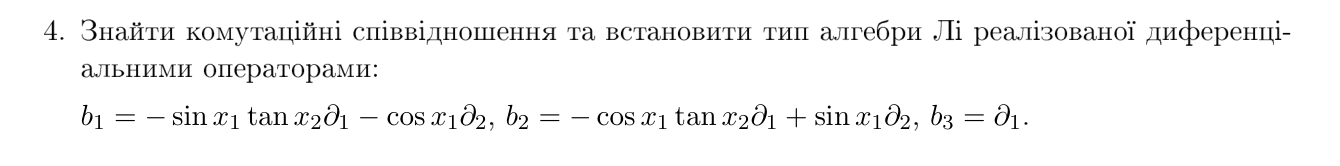

Вибачте, я не готовий рахувати таку кількість диференціалів вручну

In [90]:
import sympy as sym
from sympy import symbols, Function, Derivative as D, sin, cos, tan, diff, Matrix
import numpy as np
from sympy import init_printing, latex
from IPython.display import display, Math

In [91]:
f = symbols('f', cls=Function)
x,y = symbols('x y')
f = f(x,y)

In [92]:
b1 = -sin(x)*tan(y)*D(f,x) - cos(x)*D(f,y)
b2 = -cos(x)*tan(y)*D(f,x) +sin(x)*D(f,y)
b3 = D(f,x)
b = [b1,b2,b3]

for n,i in enumerate(b): display(Math(f"b_{n+1} = " + latex(i)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [93]:
def mu(x,y):
    return x.subs(f,y) - y.subs(f,x)

In [94]:
c = Matrix.zeros(3,3)
for n,i in enumerate(b):
    for m,j in enumerate(b[n:],start=n):
        c[n,m] = mu(i,j)
        c[m,n] = c[n,m]
        display(Math(f"\left[b_{n+1}, b_{m+1}\\right] = {latex(c[n,m])}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [95]:
simple_c = Matrix.zeros(3,3)
for n,i in enumerate(b):
    for m,j in enumerate(b[n:],start=n):
        simple_c[n,m] = c[n,m].doit().simplify()
        display(Math(f"\left[b_{n+1}, b_{m+1}\\right] = {latex(simple_c[n,m])}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [96]:
def test_literal_equality(x,y,lhs='',rhs=''):
    if lhs: lhs = lhs + " = "
    if rhs: rhs = " = " + rhs
    is_equal = (x==y)
    sign = ' = ' if is_equal else ' \\neq '
    sign = ' \quad' + sign + '\quad '
    color = 'green' if is_equal else 'red'
    text = "\\color{" + color + "}{" + lhs + latex(x) + sign + latex(y) + rhs +"}"
    display(Math(text))
    return is_equal

In [97]:
test_literal_equality(simple_c[0,1], b3, '\\left[ b_1, b_2 \\right]', 'b_3')
test_literal_equality(simple_c[0,2], -b2, '\\left[ b_1, b_3 \\right]', '-b_2')
test_literal_equality(simple_c[1,2], b1, '\\left[ b_2, b_3 \\right]', 'b_1')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

Отже, 
$$[b_1, b_2] = b_3$$
$$[b_2, b_3] = b_1$$
$$[b_3, b_1] = b_2$$
Тобто маємо алгебру $so(3)$